In [1]:
!pip install scikit-multilearn
!pip install Sastrawi
!pip install swifter
!pip install nlp-id
!pip install scikit-learn --upgrade
!pip install scipy --upgrade
!pip install sklearn --upgrade
!pip install gensim
!pip install nltk

  Using cached scikit_learn-0.22-cp38-cp38-win_amd64.whl (6.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nlp-id 0.1.12.0 requires scikit-learn==0.22, but you have scikit-learn 1.1.1 which is incompatible.


In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from skmultilearn.model_selection import IterativeStratification, iterative_train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import re
import swifter
from nlp_id.lemmatizer import Lemmatizer
import gensim
from gensim.models import Word2Vec, KeyedVectors
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

Mounted at /content/gdrive


In [743]:
df = pd.read_csv("alodokter_final.csv")
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)
df

,id,user,title,question,question_date,answer,answer_date,doctor,topic_url,topics,topic_set,risk,year,time_to_answer
0,0,Yevie Nabella Afandi,Khasiat obat zinc sulphate,Dok saya mau tanya Anak saya kan kenak fimosis...,"23 September 2017, 18:50","Hai Yevie, Terima kasih atas pertanyaannya. Zi...","24 September 2017, 10:42",dr. Annes Waren,https://www.alodokter.com/komunitas/topic-tag/...,zinc-sulphate,zinc-sulphate,low,2017,0.0
1,1,pendys,Perbedaan jenis formula zinc,siang dokter.... dokter sayang ingin bertanya ...,"5 August 2017, 12:16","Halo Pendys, Zinc merupakan salah satu minera...","5 August 2017, 16:27",dr. Aloisia Permata Sari,https://www.alodokter.com/komunitas/topic-tag/...,zinc-sulphate,zinc-sulphate,low,2017,0.0
2,2,IriSh FairiSh,Mengkonsumsi suplemen zinc yang sudah kadaluarsa,"Malam dok, saya baru menemukan suplemen zinc s...","12 December 2018, 20:54","Hai IriSh, Terimakasih telah bertanya ke Alodo...","13 December 2018, 17:08",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2018,0.0
3,3,dwifebiola,Keamanan konsumsi suplemen zinc saat program h...,"Dear dokter, Umur saya 24 tahun dan baru menik...","7 January 2019, 15:09","Selamat pagi, terimakasih atas pertanyaannya S...","8 January 2019, 09:32",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0
4,4,Lusiya,Suplemen apa yang banyak mengandung zinc.,Sakit flu tak kunjung sembuh disebabkan karena...,"30 March 2019, 06:05","Selamat malam, terimakasih atas pertanyaannya ...","30 March 2019, 20:25",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497969,260312,chacha.12,Mata kiri selalu buram dan tak membaik dengan ...,"Hallo, dok. Jadi mata saya sebelah kiri itu sa...","2 November 2018, 09:57","Halo Chacha, terimakasih atas pertanyaannya un...","2 November 2018, 18:19",dr. Irna,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina ulkus-kornea,ulkus-kornea,low,2018,0.0
497970,260313,Matrix-group,Munculnya bintik-bintik hitam ketika memandang...,"Dok, saya sewaktu tipes merasakan adanya perma...","8 November 2018, 13:20","Hai Matrix, Terimakasih telah bertanya ke Alod...","8 November 2018, 16:15",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,uveitis ablasi-retina,ablasi-retina,low,2018,0.0
497971,260314,Jesica Sepvana,kemungkinan bisa melihat normal lagi setelah o...,"Selamat malam dok, saya ingin bertanya, mama s...","25 June 2017, 21:56",Halo Jesica Sepvana Terima kasih atas pertanya...,"26 June 2017, 22:17",dr. Winda Indriati,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina,ablasi-retina,low,2017,1.0
497972,260315,Megawaty,Bagaimana cara mengatasi Ablasio retina dan hu...,"Dok, saya mau tanya bagaimana cara mengatasi a...","7 April 2017, 16:33","Halo Megawaty, Ablasi retina merupakan kondis...","10 April 2017, 10:00",dr. Yosephine. S.,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina,ablasi-retina,low,2017,2.0


In [ ]:
# df = pd.read_pickle(root_path + "alodokter_final_selected_cleaned.pkl")
# df = df.reset_index()
# df = df.iloc[:, 1:]
# df['labelmap'] = df['labelmap'].apply(lambda x: np.array(x))
# df.head()

In [745]:
df2 = df.drop_duplicates(subset=['question'], keep="first")
df2

,id,user,title,question,question_date,answer,answer_date,doctor,topic_url,topics,topic_set,risk,year,time_to_answer
0,0,Yevie Nabella Afandi,Khasiat obat zinc sulphate,Dok saya mau tanya Anak saya kan kenak fimosis...,"23 September 2017, 18:50","Hai Yevie, Terima kasih atas pertanyaannya. Zi...","24 September 2017, 10:42",dr. Annes Waren,https://www.alodokter.com/komunitas/topic-tag/...,zinc-sulphate,zinc-sulphate,low,2017,0.0
1,1,pendys,Perbedaan jenis formula zinc,siang dokter.... dokter sayang ingin bertanya ...,"5 August 2017, 12:16","Halo Pendys, Zinc merupakan salah satu minera...","5 August 2017, 16:27",dr. Aloisia Permata Sari,https://www.alodokter.com/komunitas/topic-tag/...,zinc-sulphate,zinc-sulphate,low,2017,0.0
2,2,IriSh FairiSh,Mengkonsumsi suplemen zinc yang sudah kadaluarsa,"Malam dok, saya baru menemukan suplemen zinc s...","12 December 2018, 20:54","Hai IriSh, Terimakasih telah bertanya ke Alodo...","13 December 2018, 17:08",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2018,0.0
3,3,dwifebiola,Keamanan konsumsi suplemen zinc saat program h...,"Dear dokter, Umur saya 24 tahun dan baru menik...","7 January 2019, 15:09","Selamat pagi, terimakasih atas pertanyaannya S...","8 January 2019, 09:32",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0
4,4,Lusiya,Suplemen apa yang banyak mengandung zinc.,Sakit flu tak kunjung sembuh disebabkan karena...,"30 March 2019, 06:05","Selamat malam, terimakasih atas pertanyaannya ...","30 March 2019, 20:25",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497966,260309,Yatmin The'youngest Son,pengobatan ablasi retina tanpa operasi,dak apakah Ablasi Retina bisa di sembuhkan tam...,"9 July 2018, 08:18","Halo Yatmin, Terima kasih sudah bertanya...","16 July 2018, 13:41",dr. Pratiwi Rapih Astuti Natsir,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina,ablasi-retina,low,2018,7.0
497967,260310,Debby Nungke,Efek setelah operasi ablasio retina,Sy USIA 53 thn.. Minggu dpn mau operasi ablasi...,"22 October 2017, 09:43","Halo, terimakasih atas pertanyaan yang Anda sa...","22 October 2017, 15:36",dr. Lili Dwiyani,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina,ablasi-retina,low,2017,0.0
497971,260314,Jesica Sepvana,kemungkinan bisa melihat normal lagi setelah o...,"Selamat malam dok, saya ingin bertanya, mama s...","25 June 2017, 21:56",Halo Jesica Sepvana Terima kasih atas pertanya...,"26 June 2017, 22:17",dr. Winda Indriati,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina,ablasi-retina,low,2017,1.0
497972,260315,Megawaty,Bagaimana cara mengatasi Ablasio retina dan hu...,"Dok, saya mau tanya bagaimana cara mengatasi a...","7 April 2017, 16:33","Halo Megawaty, Ablasi retina merupakan kondis...","10 April 2017, 10:00",dr. Yosephine. S.,https://www.alodokter.com/komunitas/topic-tag/...,ablasi-retina,ablasi-retina,low,2017,2.0


# Label Extraction

In [746]:
# 1 record may contain >1 topics, separated by space
# Creates new column 'topics_num' to store the no. of 'topics' per record

df2['topics_num'] = df2.topics.apply(lambda x: len(x.split(" ")))
df2.topics_num.value_counts()

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\1662327728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['topics_num'] = df2.topics.apply(lambda x: len(x.split(" ")))


1     158614
2     153299
3      36374
4       5114
5       2600
6       1211
7        445
8        136
9         37
10        11
12         3
11         2
21         1
13         1
Name: topics_num, dtype: int64

In [747]:
# Store all topics one by one to array 'labels' (duplicates included)
labels = []

for _, record in df2.iterrows():
    labels += record.topics.split(" ")

labels_set = set(labels)

In [748]:
# No. of labels
print("No. of labels in original dataset: ", len(labels_set))

No. of labels in original dataset:  1559


In [6]:
# pd.DataFrame(list(labels)).to_csv(root_path + "labels_all.csv")

In [7]:
# Count each unique topic in array 'labels'
from collections import Counter

labels_occurence = Counter(labels)
labels_occurence.most_common(10)

[('menstruasi', 31653),
 ('kehamilan', 27661),
 ('obat', 21281),
 ('asam-lambung', 17063),
 ('bayi', 15485),
 ('sakit-kepala', 11724),
 ('benjolan', 11179),
 ('kulit', 10995),
 ('alergi', 10857),
 ('kontrasepsi', 10841)]

In [749]:
# Count each unique topic in array 'labels'
from collections import Counter

labels_occurence = Counter(labels)
labels_occurence.most_common(10)

[('kehamilan', 20826),
 ('menstruasi', 19499),
 ('obat', 10757),
 ('bayi', 10452),
 ('asam-lambung', 10360),
 ('kulit', 8262),
 ('alergi', 7995),
 ('infeksi-saluran-kemih', 7602),
 ('kontrasepsi', 7496),
 ('sakit-kepala', 7178)]

## Pick top 10 topics as labels

In [750]:
# Pick 10 most common label occurences as labels_picked
labels_picked = [
    l[0] for l in labels_occurence.most_common()[:10]
]
# labels_picked
total_labels = len(labels_picked)
total_labels

10

In [751]:
# Numerize labels
label2idx = {k: v for v, k in enumerate(labels_picked)}
idx2label = {v: k for v, k in enumerate(labels_picked)}

label2idx

{'kehamilan': 0,
 'menstruasi': 1,
 'obat': 2,
 'bayi': 3,
 'asam-lambung': 4,
 'kulit': 5,
 'alergi': 6,
 'infeksi-saluran-kemih': 7,
 'kontrasepsi': 8,
 'sakit-kepala': 9}

In [42]:
idx2label[0]

'menstruasi'

In [752]:
labels_df = pd.DataFrame.from_dict(idx2label, orient="index")
labels_df.rename(columns={0:'label'}, inplace=True)
labels_df.reset_index().to_csv('labels2.csv', index=False)

# If exists
# labels_df = pd.read_csv('labels.csv')

In [753]:
labels_df

,label
0,kehamilan
1,menstruasi
2,obat
3,bayi
4,asam-lambung
5,kulit
6,alergi
7,infeksi-saluran-kemih
8,kontrasepsi
9,sakit-kepala


## Create `labelmap` to store hash array of labels

In [754]:
# Function to create a hashtable of 0's and 1's 
# for every numerized top 10 label encountered in each record in the dataset
import array as arr

def mapping(x):
    hashtable = np.zeros(total_labels, dtype=int)
    x_labels = x.split(" ")
    # kalau langsung if i in x, 'perawatan-kulit' terhitung sebagai 'kulit'
    for i in label2idx:
      for j in x_labels:
        if i == j:
            hashtable[label2idx[i]] = 1
    return hashtable

In [755]:
# Apply function mapping() to every record's 'topics' column
# Then assign hashtable to new column 'labelmap'
df2['labelmap'] = df2.topics.apply(lambda x: mapping(x))

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\1659591403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['labelmap'] = df2.topics.apply(lambda x: mapping(x))


## Select records with 'labelmap' sum > 0 (labelnya termasuk top 10)

In [756]:
# Create new column 'selected'
## Value 1 for records with 'labelmap' sum greater than 0 (row yang labelnya termasuk 10 most common)
## Value 0 otherwise
df2['selected'] = df2.labelmap.apply(lambda x: np.sum(x) > 0)

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\2954733308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['selected'] = df2.labelmap.apply(lambda x: np.sum(x) > 0)


In [757]:
# Only take into consideration records with 'labelmap' sum greater than 0
df2 = df2.loc[df2.selected]
df2

,id,user,title,question,question_date,answer,answer_date,doctor,topic_url,topics,topic_set,risk,year,time_to_answer,topics_num,labelmap,selected
6,6,Well Chici,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"19 November 2019, 23:47","Alo Weli, Terimakasih atas pertanyaannya. Zink...","20 November 2019, 13:44",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,suplemen asam-lambung zinc-sulphate,zinc-sulphate,low,2019,0.0,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",True
7,7,Marusli8765,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","2 August 2019, 07:05","Alo Marusli, Zinc merupakan salah satu minera...","2 August 2019, 10:18",dr. Devika Yuldharia,https://www.alodokter.com/komunitas/topic-tag/...,diare obat zinc-sulphate,zinc-sulphate,low,2019,0.0,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
8,8,Hani Oktaviani,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","15 October 2018, 23:12","Halo Hani, Zink merupakan mineral yang juga d...","17 October 2018, 08:32",dr. Saphira Evani,https://www.alodokter.com/komunitas/topic-tag/...,bayi zinc-sulphate,zinc-sulphate,low,2018,1.0,2,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",True
12,12,Izha Rin,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"12 February 2021, 20:40","Selamat malam, terima kasih telah bertanya di ...","12 February 2021, 22:44",dr. Amadeo Drian Basfiansa,https://www.alodokter.com/komunitas/topic-tag/...,obat zat-kimia,zat-kimia,low,2021,0.0,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
16,16,Fitriani Widyo Putri,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"26 March 2020, 07:57","Alo Fitriani, Zinc dapat membantu dalam penan...","26 March 2020, 13:57",dr. Devika Yuldharia,https://www.alodokter.com/komunitas/topic-tag/...,bayi diare zinc-sulphate,zinc-sulphate,low,2020,0.0,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497361,259704,Melani Sagita Anjani,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","23 April 2015, 21:38","Hi Melani,Alergi merupakan reaksi pertahanan t...","27 April 2015, 16:05",dr. Tri Permatadewi,https://www.alodokter.com/komunitas/topic-tag/...,alergi,alergi,low,2015,3.0,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",True
497364,259707,Hana Banua Kaltim,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"12 January 2015, 19:11","Hai Hana, Injeksi intrakutan adalah memasukkan...","12 January 2015, 21:52",dr. Debby Phanggestu,https://www.alodokter.com/komunitas/topic-tag/...,alergi,alergi,low,2015,0.0,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",True
497365,259708,Arif Ramn Kimn,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","12 March 2015, 16:36","Hallo, Penanganan terbaik pada kasus alergi ad...","13 March 2015, 13:20",dr. Yusi Capriyanti,https://www.alodokter.com/komunitas/topic-tag/...,alergi,alergi,low,2015,0.0,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",True
497366,259709,Emi Gultom,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","21 February 2015, 18:25","Hai,Alergi pada dasarnya merupakan reaksi berl...","22 February 2015, 12:18",dr. Dian Paramitasari,https://www.alodokter.com/komunitas/topic-tag/...,alergi,alergi,low,2015,0.0,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",True


In [758]:
df_use2 = df2[['title', 'question', 'answer', 'topics', 'topics_num', 'labelmap']].copy()
df_use2['labels_num'] = df_use2.labelmap.apply(lambda x: np.count_nonzero(x == 1))
df_use2.reset_index()

# Post
# df_use = pd.read_pickle(root_path + "alodokter_final_selected_2.pkl")
# df_use = df.reset_index()
# df_use = df.iloc[:, 1:]
# df_use['labelmap'] = df_use['labelmap'].apply(lambda x: np.array(x))
# df_use

,index,title,question,answer,topics,topics_num,labelmap,labels_num
0,6,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"Alo Weli, Terimakasih atas pertanyaannya. Zink...",suplemen asam-lambung zinc-sulphate,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1
1,7,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","Alo Marusli, Zinc merupakan salah satu minera...",diare obat zinc-sulphate,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
2,8,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","Halo Hani, Zink merupakan mineral yang juga d...",bayi zinc-sulphate,2,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1
3,12,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"Selamat malam, terima kasih telah bertanya di ...",obat zat-kimia,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
4,16,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"Alo Fitriani, Zinc dapat membantu dalam penan...",bayi diare zinc-sulphate,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1
...,...,...,...,...,...,...,...,...
101836,497361,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","Hi Melani,Alergi merupakan reaksi pertahanan t...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1
101837,497364,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"Hai Hana, Injeksi intrakutan adalah memasukkan...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1
101838,497365,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","Hallo, Penanganan terbaik pada kasus alergi ad...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1
101839,497366,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","Hai,Alergi pada dasarnya merupakan reaksi berl...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1


In [731]:
df_use2.describe()

,topics_num,labels_num
count,101841.000000,101841.000000
mean,1.955745,1.084308
std,0.992497,0.284658
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,1.000000
max,21.000000,3.000000


## Analyze Selected Data

In [732]:
'''Get max & min length of titles'''
print("MAX length of title column")
print(df_use.title.map(lambda x: len(x)).max())
print("-----")
print("MIN length of title column")
print(df_use.title.map(lambda x: len(x)).min())

'''Get max & min length of questions'''
print("MAX length of question column")
print(df_use.question.map(lambda x: len(x)).max())
print("-----")
print("MIN length of question column")
print(df_use.question.map(lambda x: len(x)).min())

'''Get max & min length of answers'''
print("MAX length of answer column")
print(df_use.answer.map(lambda x: len(x)).max())
print("-----")
print("MIN length of answer column")
print(df_use.answer.map(lambda x: len(x)).min())

MAX length of title column
195
-----
MIN length of title column
2
MAX length of question column
22079
-----
MIN length of question column
1
MAX length of answer column
16559
-----
MIN length of answer column
1


In [759]:
'''Get max & min length of titles'''
print("MAX length of title column")
print(df_use2.title.map(lambda x: len(x)).max())
print("-----")
print("MIN length of title column")
print(df_use2.title.map(lambda x: len(x)).min())

'''Get max & min length of questions'''
print("MAX length of question column")
print(df_use2.question.map(lambda x: len(x)).max())
print("-----")
print("MIN length of question column")
print(df_use2.question.map(lambda x: len(x)).min())

'''Get max & min length of answers'''
print("MAX length of answer column")
print(df_use2.answer.map(lambda x: len(x)).max())
print("-----")
print("MIN length of answer column")
print(df_use2.answer.map(lambda x: len(x)).min())

MAX length of title column
176
-----
MIN length of title column
2
MAX length of question column
22079
-----
MIN length of question column
1
MAX length of answer column
16559
-----
MIN length of answer column
1


In [763]:
''' Get the index of the shortest questions '''
lengths = df_use2['question'].str.len()
argmax = np.where(lengths == lengths.min())[0] # get the indexes
df_use2.iloc[argmax]

,title,question,answer,topics,topics_num,labelmap,labels_num
86707,Jika gigi sakit kepala ikut sakit,i,"Hai Yaya,Sakit kepala yang Anda alami disebut ...",sakit-kepala sakit-gigi,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1


In [787]:
''' Get the index of the shortestanswers '''
lengths = df_use2['answer'].str.len()
argmax = np.where(lengths == lengths.min())[0] # get the indexes
df_use2.iloc[argmax]

,title,question,answer,topics,topics_num,labelmap,labels_num
260639,Penyebab flek darah setelah pemakaian KB implan,Sok sy mau t? Sya kan bln 9 2015 kmrn masang k...,"Hai,Pertanyaannya sudah dijawab ya.dr.Annes",kontrasepsi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
310832,Belum menghendaki kehamilan,"selamat siang dok, saya mau tanya saya mens bu...","Hai,Pertanyaannya sudah dijawab ya,dr.Annes",kehamilan,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
310873,tanda-tanda awal kehamilan,mallam dok dok saya mau nanya saya bysa haiid ...,"Hai,Pertanyaannya sudah dijawab ya.dr.Annes",kehamilan,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
311469,Menstruasi hanya sehari dan kaitan dengan keha...,Dok.. Saya kan mens buln april tanggal 26 .. L...,"Halo,Pertanyaannya sudah dijawab yadr.Annes",kehamilan mentsruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
486554,Cara mengatasi perut yang kembung,dok saya mau nanya. knpa perut sya kembung dan...,HalloPertanyaan Arwin sudah dijawab disini,asam-lambung,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1


In [786]:
df_use2.drop([260639, 310832, 310872], inplace=True)
df_use2.reset_index()

,index,title,question,answer,topics,topics_num,labelmap,labels_num
0,6,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"Alo Weli, Terimakasih atas pertanyaannya. Zink...",suplemen asam-lambung zinc-sulphate,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1
1,7,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","Alo Marusli, Zinc merupakan salah satu minera...",diare obat zinc-sulphate,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
2,8,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","Halo Hani, Zink merupakan mineral yang juga d...",bayi zinc-sulphate,2,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1
3,12,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"Selamat malam, terima kasih telah bertanya di ...",obat zat-kimia,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
4,16,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"Alo Fitriani, Zinc dapat membantu dalam penan...",bayi diare zinc-sulphate,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1
...,...,...,...,...,...,...,...,...
101786,497361,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","Hi Melani,Alergi merupakan reaksi pertahanan t...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1
101787,497364,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"Hai Hana, Injeksi intrakutan adalah memasukkan...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1
101788,497365,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","Hallo, Penanganan terbaik pada kasus alergi ad...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1
101789,497366,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","Hai,Alergi pada dasarnya merupakan reaksi berl...",alergi,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",1


In [17]:
df_use2 = df_use.drop_duplicates(subset=['user', 'title', 'question', 'answer'], keep="first")
df_use2

,user,title,question,answer,topics,topics_num,labelmap,labels_num
6,Well Chici,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"Alo Weli, Terimakasih atas pertanyaannya. Zink...",suplemen asam-lambung zinc-sulphate,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1
7,Marusli8765,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","Alo Marusli, Zinc merupakan salah satu minera...",diare obat zinc-sulphate,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
8,Hani Oktaviani,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","Halo Hani, Zink merupakan mineral yang juga d...",bayi zinc-sulphate,2,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1
12,Izha Rin,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"Selamat malam, terima kasih telah bertanya di ...",obat zat-kimia,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
16,Fitriani Widyo Putri,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"Alo Fitriani, Zinc dapat membantu dalam penan...",bayi diare zinc-sulphate,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1
...,...,...,...,...,...,...,...,...
497361,Melani Sagita Anjani,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","Hi Melani,Alergi merupakan reaksi pertahanan t...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
497364,Hana Banua Kaltim,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"Hai Hana, Injeksi intrakutan adalah memasukkan...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
497365,Arif Ramn Kimn,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","Hallo, Penanganan terbaik pada kasus alergi ad...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
497366,Emi Gultom,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","Hai,Alergi pada dasarnya merupakan reaksi berl...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1


In [761]:
labels2 = []

for _, record in df_use2.iterrows():
    labels2 += record.topics.split(" ")
    
labels2_counter = Counter(labels2)
labels2_name = [i[0] for i in labels2_counter.most_common(10)]
labels2_freq = [i[1] for i in labels2_counter.most_common(10)]

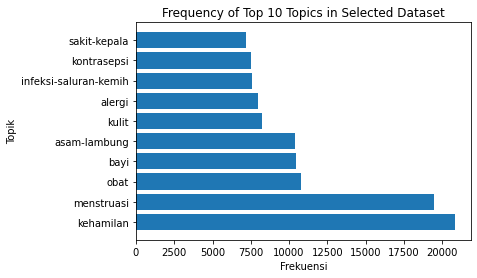

In [762]:
f, ax = plt.subplots()

plt.barh(labels2_name, labels2_freq)
plt.xlabel("Frekuensi")
plt.ylabel("Topik")
plt.title('Frequency of Top 10 Topics in Selected Dataset')

plt.show()

# Check Classes

In [51]:
Counter(combination for row in get_combination_wise_output_matrix(df_use2['labelmap'], order=1) for combination in row)

Counter({(7,): 8315,
         (6,): 6956,
         (8,): 8064,
         (1,): 21042,
         (0,): 19767,
         (4,): 10524,
         (3,): 10497,
         (2,): 10852,
         (5,): 7301,
         (9,): 7582})

In [52]:
# Check distribution of classes
vis = pd.DataFrame(df_use2.labelmap.values.tolist(), columns=['menstruasi', 'kehamilan','obat','asam-lambung','bayi','sakit-kepala','benjolan','kulit','alergi','kontrasepsi'])
vis = vis.astype(int)
vis

,menstruasi,kehamilan,obat,asam-lambung,bayi,sakit-kepala,benjolan,kulit,alergi,kontrasepsi
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
102282,0,0,1,0,0,0,0,0,0,0
102283,0,0,1,0,0,0,0,0,0,0
102284,0,0,1,0,0,0,0,0,0,0
102285,0,0,1,0,0,0,0,0,0,0


In [53]:
counts = vis.sum()
print(counts)

menstruasi      19767
kehamilan       21042
obat            10852
asam-lambung    10497
bayi            10524
sakit-kepala     7301
benjolan         6956
kulit            8315
alergi           8064
kontrasepsi      7582
dtype: int64


# [optional] Select records with threshold = 10000 for each label, supaya distribusinya lebih rata

In [22]:
labels_str = np.array(vis.columns)
threshold = 10000         # Every label has at least 10000 records

# Create dataframe for each label to store selected indexes
d = {label: pd.DataFrame() for label in labels_str}

for i in vis.columns:
  d[i] = pd.DataFrame(vis[i].values)
  d[i] = d[i].set_axis(['label'], axis=1, inplace=False)    # Rename column name as 'label'
  d[i] = d[i].loc[d[i]['label'] == 1]
  
  # Select random rows sebanyak threshold
  d[i] = d[i].sample(n=threshold)
  d[i] = d[i].reset_index()

In [23]:
d['obat']

,index,label
0,21298,1
1,32200,1
2,34488,1
3,41233,1
4,41369,1
...,...,...
9995,36158,1
9996,30978,1
9997,141982,1
9998,21509,1


In [24]:
# Store selected indexes from all label dataframes in set
ids = []
for i in vis.columns:
  ids.extend(d[i]['index'].values)

ids = list(set(ids))

In [18]:
# selected_data = df_use.iloc[ids]
# selected_data.reset_index()

selected_data = df_use2
selected_data.reset_index()

,index,user,title,question,answer,topics,topics_num,labelmap,labels_num
0,6,Well Chici,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"Alo Weli, Terimakasih atas pertanyaannya. Zink...",suplemen asam-lambung zinc-sulphate,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1
1,7,Marusli8765,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","Alo Marusli, Zinc merupakan salah satu minera...",diare obat zinc-sulphate,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
2,8,Hani Oktaviani,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","Halo Hani, Zink merupakan mineral yang juga d...",bayi zinc-sulphate,2,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1
3,12,Izha Rin,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"Selamat malam, terima kasih telah bertanya di ...",obat zat-kimia,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1
4,16,Fitriani Widyo Putri,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"Alo Fitriani, Zinc dapat membantu dalam penan...",bayi diare zinc-sulphate,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1
...,...,...,...,...,...,...,...,...,...
102282,497361,Melani Sagita Anjani,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","Hi Melani,Alergi merupakan reaksi pertahanan t...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
102283,497364,Hana Banua Kaltim,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"Hai Hana, Injeksi intrakutan adalah memasukkan...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
102284,497365,Arif Ramn Kimn,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","Hallo, Penanganan terbaik pada kasus alergi ad...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1
102285,497366,Emi Gultom,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","Hai,Alergi pada dasarnya merupakan reaksi berl...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1


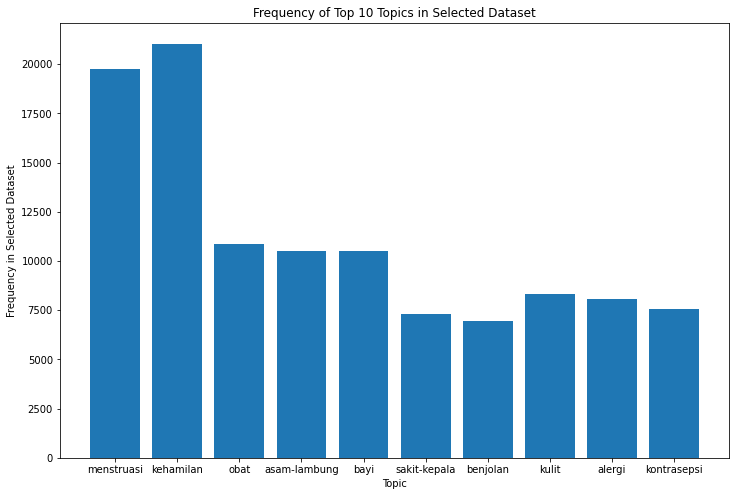

In [58]:
# Check distribution of classes
vis_selected = pd.DataFrame(selected_data.labelmap.values.tolist(), columns=['menstruasi', 'kehamilan','obat','asam-lambung','bayi','sakit-kepala','benjolan','kulit','alergi','kontrasepsi'])
vis_selected = vis_selected.astype(int)

counts = vis_selected.sum()

plt.figure(figsize=(12,8))
plt.bar(np.array(vis_selected.columns), counts)
plt.xlabel('Topic')
plt.ylabel('Frequency in Selected Dataset')
plt.title('Frequency of Top 10 Topics in Selected Dataset')
plt.show()

# Q-A text preprocessing

# Text_clean column

In [72]:
# Tokenize 'text_clean' column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(selected_data['text_clean'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# max_length = max([len(seq) for seq in sequences])
max_length = 300


embedding_matrix = np.zeros((len(word_index) + 1, id_w2v.vector_size))
oov = 0
oov_list = []

'''
For Word2Vec
'''
for word, i in word_index.items():
    try:
        embedding_matrix[i] = id_w2v[word]
    except KeyError:
        oov += 1
        oov_list.append(word)
        continue

'''
For FastText
'''
# for word, i in word_index.items():
#     if ft.wv[word] is not None:
#         embedding_matrix[i] = ft.wv[word]
#     else:
#         oov += 1

print("Out of vocab: ")
print(oov)

Found 61021 unique tokens.
Out of vocab: 
43910


In [73]:
# Tokenize 'text_clean' column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(selected_data['text_clean_fixtypo'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# max_length = max([len(seq) for seq in sequences])
max_length = 300


embedding_matrix = np.zeros((len(word_index) + 1, id_w2v.vector_size))
oov = 0
oov_list = []

'''
For Word2Vec
'''
for word, i in word_index.items():
    try:
        embedding_matrix[i] = id_w2v[word]
    except KeyError:
        oov += 1
        oov_list.append(word)
        continue

'''
For FastText
'''
# for word, i in word_index.items():
#     if ft.wv[word] is not None:
#         embedding_matrix[i] = ft.wv[word]
#     else:
#         oov += 1

print("Out of vocab: ")
print(oov)

Found 41091 unique tokens.
Out of vocab: 
8147


In [84]:
oov_list

['alodokter',
 'primolut',
 'lsdexception',
 'cetirizine',
 'unhidewhenused',
 'semihidden',
 'lansoprazole',
 'mefenamat',
 'microgynon',
 'methylprednisolone',
 'cefixime',
 'sucralfate',
 'cefadroxil',
 'ngeluarin',
 'clindamycin',
 'bebelove',
 'utrogestan',
 'diagnosanya',
 'domperidone',
 'hydrocortisone',
 'transvaginal',
 'minoxidil',
 'gentamicin',
 'museosans',
 'scabimite',
 'sangobion',
 'meloxicam',
 'stretchmark',
 'sukralfat',
 'testpeck',
 'trimaksh',
 'traneksamat',
 'amoxcilin',
 'mefenamic',
 'dokterimakasih',
 'doxycycline',
 'bioplacenton',
 'clobazam',
 'duphaston',
 'levofloxacin',
 'ngobatinnya',
 'candesartan',
 'strechmark',
 'nyembuhin',
 'pyrazinamide',
 'combantrin',
 'demacolin',
 'ngatasinnya',
 'neurobion',
 'niacinamide',
 'norethisterone',
 'albothyl',
 'lanzoprazole',
 'clopidogrel',
 'fibroadenoma',
 'cytotec',
 'azithromycin',
 'erlamycetin',
 'cetrizine',
 'nyembuhinnya',
 'piroxicam',
 'theraskin',
 'roaccutane',
 'trimakash',
 'betahistine',
 'va

## FastText

In [19]:
embedding_path = "cc.id.300.bin/cc.id.300.bin"
ft = KeyedVectors.load('fasttext_gensim.model')

In [50]:
ft.most_similar("komputer")

[('computer', 0.8221502900123596),
 ('komputer.Komputer', 0.7844359278678894),
 ('komputerKomputer', 0.7773385643959045),
 ('komputer1', 0.7759630084037781),
 ('komputerkomputer', 0.7742171287536621),
 ('komputer3', 0.7694596648216248),
 ('komputeryang', 0.7546691298484802),
 ('komputer2', 0.750238835811615),
 ('komputer-', 0.7439745664596558),
 ('Komputer', 0.7383776903152466)]

## Fix typos (use Word2Vec embedding)
Source: https://medium.com/@yasirabd/spell-check-indonesia-menggunakan-pre-trained-fasttext-model-14e90a3f1ac0

In [27]:
path = 'idwiki/idwiki_word2vec_300.model'
w2v_model = Word2Vec.load(path)

In [43]:
id_w2v["komputer"]

memmap([ 1.8987454e+00,  6.3871616e-01,  6.2249232e-02, -9.8417026e-01,
         1.9442661e+00,  6.6903222e-01,  4.2731267e-01,  2.0785322e+00,
        -1.1744146e+00, -7.9381809e-02,  2.7540359e+00,  1.5211607e+00,
        -1.0047150e+00, -2.9493436e-01, -2.3271897e+00,  1.4287660e+00,
         2.1902096e-01,  6.8374705e-01, -3.9510259e-01,  4.6455598e-01,
         6.6141516e-01, -7.9703677e-01,  3.5268018e-01,  2.0759397e+00,
         9.5513713e-01,  1.8345157e+00, -2.6075218e+00,  9.1378939e-01,
        -6.4605705e-02, -1.4265233e+00,  3.7242168e-01, -4.3149695e-02,
         9.4253010e-01, -8.8542473e-01,  4.2161080e-01,  2.6199522e+00,
        -1.1772690e+00,  4.3350425e-01,  1.8209504e+00,  8.2113552e-01,
         1.1391125e+00, -1.1978949e+00, -1.2656624e+00, -1.1175097e+00,
         1.8944209e+00, -1.2154016e+00, -1.7810198e+00,  1.1399087e+00,
        -7.7121860e-01, -7.9109150e-01,  2.3734912e-01,  2.7953010e+00,
         1.1560320e+00,  2.3024731e+00,  6.6927043e-03,  1.48492

In [20]:
# word_vectors = w2v_model.wv
# word_vectors.save("id-word2vec")

# Load back with memory-mapping = read-only, shared across processes.
id_w2v = KeyedVectors.load("id-word2vec", mmap='r')
len(id_w2v)

331792

In [21]:
words = list(id_w2v.key_to_index)

w_rank = {}
for i, word in enumerate(words):
    w_rank[word] = i

# Save word rank
WORDS = w_rank

In [61]:
import itertools

ws = ["komputer", "komptr", "pusink", "lhiran", "bgmn"]

c = [correction(w) for w in ws]
c = [word for word in c if len(word)>3] # hapus kata yang <= 3 huruf
c = [word for word in c if word not in data_stopwords] # hapus stopword
result_sentence = " ".join(c).strip()
result_sentence

'komputer kompor pusing lahiran'

In [22]:
def P(word):
    # Probability of `word`
    return - WORDS.get(word, 0)

def correction(word):
    # Most probable spelling correction for word
    return max(candidates(word), key=P)

def candidates(word):
    # Generate possible spelling corrections for word
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
    
def known(words):
    # Subset of `words` that appear in WORDS
    return set(w for w in words if w in WORDS)

def edits1(word):
    # Words that are 1 edit away from `word`
    letters = 'abcdefghjklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # All edits that are 2 edits away from `word`
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

## Title + Question (basic preprocessing)

In [23]:
stop_factory = StopWordRemoverFactory()
more_stopwords = ['dengan', 'ia', 'bahwa', 'oleh', 'nya', 'jadi', 'untuk', 'dok', 'dokter', 'assalamualaikum', "assalamu'alaikum", 'selamat', 'hallo', 'halo', 'terimakasih']
data_stopwords = stop_factory.get_stop_words() + more_stopwords

In [24]:
lemmatizer = Lemmatizer()

def preprocess(s):
    '''Lowercase, noise removal (symbols, extra symbols, extra spaces,
    fix typos, words with length < 3, stop words), lemmatize'''

    s = s.strip().lower()   #case folding dan menghilangkan new line
    s = re.sub(r'(\W)(?=\1)', '', s) #hapus duplikat tanda baca
    s = s.replace("\n", " ") #hapus line break
    sentence = re.sub(r'[^a-zA-Z]', ' ', s) #hapus simbol dan angka
    sentence = re.sub(r"\b[a-zA-Z]\b", " ", sentence) #remove 1 alphabet
    sentence = lemmatizer.lemmatize(sentence) # lemmatisasi
    sentence = re.sub(' +', ' ', sentence) # remove double space
    sentence = sentence.split(" ")
    sentence = [word for word in sentence if len(word)>3] # hapus kata yang <= 3 huruf
    sentence = [word for word in sentence if word not in data_stopwords] # hapus stopword
    result_sentence = " ".join(sentence).strip()
    
    return result_sentence

In [25]:
selected_data['title_clean'] = selected_data.title.swifter.apply(lambda x: preprocess(x))
selected_data['question_clean'] = selected_data.question.swifter.apply(lambda x: preprocess(x))

Pandas Apply:   0%|          | 0/102287 [00:00<?, ?it/s]

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\165896652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['title_clean'] = selected_data.title.swifter.apply(lambda x: preprocess(x))


Pandas Apply:   0%|          | 0/102287 [00:00<?, ?it/s]

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\165896652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['question_clean'] = selected_data.question.swifter.apply(lambda x: preprocess(x))


In [26]:
def fix_typos(text):
    text = text.split(" ")
    words = [correction(word) for word in text]
    result = " ".join(words).strip()
    return result

In [27]:
selected_data['title_clean_fixtypo'] = selected_data.title_clean.swifter.apply(lambda x: fix_typos(x))
selected_data['question_clean_fixtypo'] = selected_data.question_clean.swifter.apply(lambda x: fix_typos(x))
selected_data

Pandas Apply:   0%|          | 0/102287 [00:00<?, ?it/s]

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\3626110018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['title_clean_fixtypo'] = selected_data.title_clean.swifter.apply(lambda x: fix_typos(x))


Pandas Apply:   0%|          | 0/102287 [00:00<?, ?it/s]

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\3626110018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['question_clean_fixtypo'] = selected_data.question_clean.swifter.apply(lambda x: fix_typos(x))


,user,title,question,answer,topics,topics_num,labelmap,labels_num,title_clean,question_clean,title_clean_fixtypo,question_clean_fixtypo
6,Well Chici,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"Alo Weli, Terimakasih atas pertanyaannya. Zink...",suplemen asam-lambung zinc-sulphate,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",1,konsumsi zinc derita asam lambung,punya riwayat asam lambung konsumsi zinc,konsumsi zinc derita asam lambung,punya riwayat asam lambung konsumsi zinc
7,Marusli8765,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","Alo Marusli, Zinc merupakan salah satu minera...",diare obat zinc-sulphate,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1,tata cara konsumsi zinc sulphate,pagi informasi tapis herbal kapsul zinc anak l...,tata cara konsumsi zinc sulphate,pagi informasi tapis herbal kapsul zinc anak l...
8,Hani Oktaviani,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","Halo Hani, Zink merupakan mineral yang juga d...",bayi zinc-sulphate,2,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,zinc bayi usia bulan,konsul anak usia bulan beberapa hari anak maaf...,zinc bayi usia bulan,konsul anak usia bulan beberapa hari anak maaf...
12,Izha Rin,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"Selamat malam, terima kasih telah bertanya di ...",obat zat-kimia,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1,dampak salah atur konsumsi minum obat,malam tanya periksa kasih obat bilang kalo min...,dampak salah atur konsumsi minum obat,malam tanya periksa kasih obat bilang kalo min...
16,Fitriani Widyo Putri,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"Alo Fitriani, Zinc dapat membantu dalam penan...",bayi diare zinc-sulphate,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",1,hitung hari beri dosis zinc bayi diare,bagaimana hitung hari konsumsi obat diare zinc...,hitung hari beri dosis zinc bayi diare,bagaimana hitung hari konsumsi obat diare zinc...
...,...,...,...,...,...,...,...,...,...,...,...,...
497361,Melani Sagita Anjani,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","Hi Melani,Alergi merupakan reaksi pertahanan t...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,solusi ampuh obat tebaik obat sakit alergi,malam nanya sakit alergi sembuh obat alergi pa...,solusi ampuh obat tebaik obat sakit alergi,malam nanya sakit alergi sembuh obat alergi pa...
497364,Hana Banua Kaltim,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"Hai Hana, Injeksi intrakutan adalah memasukkan...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,manfaat injeksi intracutan cara lebih luas,injeksi intra tahu reaksi alergi,manfaat injeksi intracutan cara lebih luas,injeksi intra tahu reaksi alergi
497365,Arif Ramn Kimn,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","Hallo, Penanganan terbaik pada kasus alergi ad...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,obat alergi makan,punya keluh alergi makan telur udang kacang ki...,obat alergi makan,punya keluh alergi makan telur udang kacang ki...
497366,Emi Gultom,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","Hai,Alergi pada dasarnya merupakan reaksi berl...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",1,alergi tetap kambuh,haloo tanya alergi sebar seluruh tubuh soal al...,alergi tetap kambuh,paloo tanya alergi sebar seluruh tubuh soal al...


In [28]:
selected_data['text_clean'] = selected_data['title_clean'] + ' ' + selected_data['question_clean']
selected_data['text_clean_fixtypo'] = selected_data['title_clean_fixtypo'] + ' ' + selected_data['question_clean_fixtypo']

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\2072347434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['text_clean'] = selected_data['title_clean'] + ' ' + selected_data['question_clean']
C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\2072347434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['text_clean_fixtypo'] = selected_data['title_clean_fixtypo'] + ' ' + selected_data['question_clean_fixtypo']


## Answer  (summarization)
Answer column needs to be summarized, not cleaned, to maintain sentence structure

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

def summarize(text):
    sw = set(stopwords.words("indonesian"))
    words = word_tokenize(text)

    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in sw:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    # Creatinng a dictianary to keep the score
    sentences = sent_tokenize(text)
    sentenceValue = dict()

    for sentence in sentences:
        for word, freq in freqTable.items():
            if word in sentence.lower():
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freq
                else:
                    sentenceValue[sentence] = freq
    
    sumValues = 0
    for sentence in sentenceValue:
        sumValues += sentenceValue[sentence]

    avg = int(sumValues / len(sentenceValue))
    summary = ''
    for sentence in sentences:
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (avg)):
            summary += " " + sentence

    return summary

In [33]:
selected_data['answer_clean'] = selected_data.answer.swifter.apply(lambda x: summarize(x))

Pandas Apply:   0%|          | 0/102287 [00:00<?, ?it/s]

ZeroDivisionError: division by zero

In [79]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tugas
[nltk_data]     Akhir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [80]:
st = sent_tokenize(selected_data['answer'].values[0])
if "Alo" in st[0]:
  st = st[1:]
st

['Zink  (seng) adalah mineral yang dibutuhkan tubuh untuk mempercepat penyembuhan luka, meningkatkan fungsi indera perasa dan indera penciuman, meningkatkan daya tahan tubuh, membantu pertumbuhan sel, sekaligus mengurai karbohidrat.',
 'Orang yang mengalami diare berat, mengalami gangguan usus sehingga menyebabkan penyerapan zink terganggu, atau habis menjalani operasi besar berisiko mengalami kekurangan zink sehingga memerlukan asupan suplemen zink tambahan.',
 'Namun, meski termasuk obat bebas, Anda tidak disarankan mengkonsumsi suplemen zink sembarangan, terlebih dalam jangka panjang, tanpa saran dokter ya.. Orang yang memiliki riwayat mengalami penyakit asam lambung (dispepsia) tidak dilarang mengkonsumsi zink.',
 'Konsumsi suplemen ini perlu dilakukan dengan sangat hati-hati pada kondisi khusus, seperti ibu hamil, ibu menyusui, anak-anak, penderita gangguan ginjal, atau juga orang dengan riwayat alergi terhadap zink.',
 'Baiknya, sebelum mengkonsumsi suplemen zink, Anda periksakan

In [ ]:
def summarize(text):
  sentences = sent_tokenize(text)
  sentences_clean = [re.sub(r'[^\w\s]','',sentence.lower()) for sentence in sentences]
  sentence_tokens = [[words for words in sentence.split(' ')] for sentence in sentences_clean]

  w2v = Word2Vec(sentence_tokens,size=1,min_count=1,iter=1000)
  sentence_embeddings = [[w2v[word][0] for word in words] for words in sentence_tokens]
  max_len = max([len(tokens) for tokens in sentence_tokens])
  sentence_embeddings = [np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]

  similarity_matrix = np.zeros([len(sentence_tokens), len(sentence_tokens)])

  for i,row_embedding in enumerate(sentence_embeddings):
      for j,column_embedding in enumerate(sentence_embeddings):
          similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)

  nx_graph = nx.from_numpy_array(similarity_matrix)
  scores = nx.pagerank_numpy(nx_graph)

  top_sentence = {sentence:scores[index] for index,sentence in enumerate(sentences)}
  top = dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:4])
  
  summed_text = ''

  for sent in sentences:
    if sent in top.keys():
        summed_text = summed_text + sent

  return summed_text

In [ ]:
df_use['answer_clean'] = df_use.answer.apply(lambda x: summarize(x))
df_use

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.


# Export df_use

In [30]:
selected_data['labelmap'] = selected_data['labelmap'].map(list)

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\13748515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['labelmap'] = selected_data['labelmap'].map(list)


In [31]:
selected_data.to_csv('alodokter_final_selected_6.csv', encoding='utf8',index=False)

In [32]:
selected_data.to_pickle('alodokter_final_selected_6.pkl')

# Cleaning Answer & Exporting CSV for each label

In [35]:
df = pd.read_pickle("alodokter_final_selected_7.pkl")
df = df.reset_index()
df = df.iloc[:, 1:]
df['labelmap'] = df['labelmap'].apply(lambda x: np.array(x))

In [108]:
df

,Unnamed: 0,index,user,title,question,answer,topics,topics_num,labelmap,title_clean,question_clean,text_clean,answer_clean
0,0,0,Saepudin,Lidah mati rasa setelah berkumur menggunakan s...,Slmt mlm doc...saya salah kumur2 niat mau pake...,"Alo Saepudin, Terima kasih atas pertanyaannya....",alergi zat-kimia,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",lidah mati rasa kumur sabun cair,slmt salah kumur niat pake laserin nyata kumur...,lidah mati rasa kumur sabun cair slmt salah ku...,Apabila terjadi kerusakan pada ujung-ujung sa...
1,1,1,Tiwi,Efek samping mencampur body lotion,"Hallo dok, saya mau bertanya, apakah baik mema...","Alo, Terimakasih atas pertanyaan anda di Alodo...",alergi zat-kimia,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",efek samping campur body lotion,tanya baik memakain lotions vaseline healthy w...,efek samping campur body lotion tanya baik mem...,Body lotion merupakan salah satu product yang...
2,2,2,Dwi lutvia nadila,Penyebab mata bengkak setelah cat rambut,"Halo dok, saya mau bertanya. Jadi saya melakuk...","Alo, terimakasih atas pertanyaannya. Nyeri dan...",alergi zat-kimia,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",mata bengkak rambut,tanya laku rambut jelang kurang lebih rasa sak...,mata bengkak rambut tanya laku rambut jelang k...,"Bukan hanya alergi terhadap cat rambut, bisa ..."
3,3,3,Annie DJuneo,Penanganan pada mata anak setelah terkena cipr...,"Dok, anak saya umur 9bulan terkena cipratan ha...","Alo, terimakasih atas pertanyaannya. Handsanit...",alergi zat-kimia,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",tangan mata anak kena ciprat handsanitizer,anak umur bulan kena ciprat handsanitizer lgsg...,tangan mata anak kena ciprat handsanitizer ana...,"Kandungan dalam hand sanitizer ini, jika masu..."
4,4,4,Rindu Gaming,Efek samping tangan terkena air raksa dari ter...,Jika thermometer air raksa di laboratorium pec...,"Alo, terimakasih atas pertanyaannya. Kontak an...",alergi zat-kimia,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",efek samping tangan kena raksa termometer,thermometer raksa laboratorium pecah kena tang...,efek samping tangan kena raksa termometer ther...,Kontak antara kulit dengan air raksa (Mercu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,7641,10126,Melani Sagita Anjani,solusi ampuh obat tebaik untuk mengobati penya...,"Malam dok, saya mau nanya? Apa penyakit alergi...","Hi Melani,Alergi merupakan reaksi pertahanan t...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",solusi ampuh obat tebaik obat sakit alergi,malam nanya sakit alergi sembuh obat alergi pa...,solusi ampuh obat tebaik obat sakit alergi mal...,"Hi Melani,Alergi merupakan reaksi pertahanan ..."
7642,7642,10129,Hana Banua Kaltim,apa manfaat injeksi intracutan secara lebih luas?,dok injeksi intra cutan apa hanya untuk menget...,"Hai Hana, Injeksi intrakutan adalah memasukkan...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",manfaat injeksi intrakutan cara lebih luas,injeksi intra tahu reaksi alergi,manfaat injeksi intrakutan cara lebih luas inj...,"Hai Hana, Injeksi intrakutan adalah memasukka..."
7643,7643,10130,Arif Ramn Kimn,Obat untuk alergi makanan,"Hai dok ,, Sy mempunyai keluhan alergi makanan...","Hallo, Penanganan terbaik pada kasus alergi ad...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",obat alergi makan,punya keluh alergi makan telur udang kacang ki...,obat alergi makan punya keluh alergi makan tel...,(baca artikel Alergi di SINI )Jadi jika And...
7644,7644,10131,Emi Gultom,alergi tetap kambuh,"haloo..mau tanya aja,alergi itu menyebar ke se...","Hai,Alergi pada dasarnya merupakan reaksi berl...",alergi,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",alergi tetap kambuh,haloo tanya alergi sebar seluruh tubuh soal al...,alergi tetap kambuh haloo tanya alergi sebar s...,Berikut merupakan beberapa gejala yang dapat ...


In [704]:
df = pd.read_csv("menstruasi2.csv")
df

,user,title,question,answer,topics,topics_num,labelmap,title_clean,question_clean,text_clean,answer_clean
0,Rachmawaty Turangan,Konsumsi obat penghenti pendarahan wasir saat ...,"Malam dok,sy kena wasir stadium 3 udah pendara...",Hai. Wasir atau hemoroid merupakan suatu keada...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",konsumsi obat henti darah wasir sedang haid,malam kena wasir stadium udah darah kasi kalne...,konsumsi obat henti darah wasir sedang haid ma...,Wasir atau hemoroid merupakan suatu keadaan d...
1,milasiti,Penyebab pendarahan,Dok kemarin hari 1 saya haid ada darah di cela...,"Hallo Milasiti, terima kasih telah bertanya di...",wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",darah,kemarin hari haid darah celana beberapa kemudi...,darah kemarin hari haid darah celana beberapa ...,Keluhan peradarahan yang anda alami kemungkin...
2,dzakia,Pengaruh obat wasir terhadap siklus menstruasi,"Malam dok,pada tanggal 12 april ambeyen saya k...",Halo dzakia...... Terimakasih atas pertanyaan ...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",pengaruh obat wasir hadap siklus menstruasi,malam tanggal april ambeyen kumat keluar darah...,pengaruh obat wasir hadap siklus menstruasi ma...,Obat yang diberikan kepada Anda untuk menghen...
3,Deni Alpiana,Apa obat untuk Menstruasi tak teratur?,"Assalamualaikum Dok, Saya mempunyai teman wani...","Hai,Sebaiknya diperhatikan kembali apakah dara...",menstruasi wasir,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",obat menstruasi atur,punya teman wanita tanya tiap makan bakso peda...,obat menstruasi atur punya teman wanita tanya ...,"Hai,Sebaiknya diperhatikan kembali apakah dar..."
4,Ledy Tesya Fitria,Bagaimana cara menyembuhkan benjolan di dubur?,assallamualaikum dok.. sudah 4 tahun ini saya ...,Terima kasih Ledy atas pertanyaannya.Benjolan ...,menstruasi benjolan wasir nyeri-haid,4,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",bagaimana cara sembuh benjol dubur,assalamualaikum tahun sering keluar darah dubu...,bagaimana cara sembuh benjol dubur assalamuala...,"Namun, tentu saja masi terdapat berbagai hal ..."
...,...,...,...,...,...,...,...,...,...,...,...
10087,Novia,Penyebab siklus haid tidak beraturan disertai ...,"Halo dok,selamat sore. Saya baru nikah 3 bulan...",Terima kasih atas pertanyaannya di Alodokter. ...,menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",siklus haid atur mual pusing sering sendawa,sore baru nikah bulan lama haid rutin maju sat...,siklus haid atur mual pusing sering sendawa so...,Siklus menstruasi normal adalah pada rentang...
10088,Mzdroses,Penyebab munculnya gumpalan putih saat haid me...,"Halodok saya ingin bertanya,,pacar saya sudah ...","Selamat pagi, terima kasih telah bertanya di A...",menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",muncul gumpal putih haid meski pernah hubung i...,glodok tanya pacar kali menstruasi keluar gump...,muncul gumpal putih haid meski pernah hubung i...,"Selamat pagi, terima kasih telah bertanya di ..."
10089,Fika Andriyanti,Penyebab perut sakit saat menstruasi disertai ...,"Sore dok , sebelum menikah setiap men's says m...","Halo Fika, Nyeri saat menstruasi atau disebut ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",perut sakit menstruasi mulas muntah keringat d...,sore nikah tiap says rasa skit liar biasa says...,perut sakit menstruasi mulas muntah keringat d...,"Halo Fika, Nyeri saat menstruasi atau disebut..."
10090,Arjuna Grosir,Nyeri haid hingga sulit berjalan semenjak mela...,"Hallo dok.. saya mau tanya,Saat ini saya menga...","Alo Arjuna Grosir, Dysmenorrhea adalah nyeri ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",nyeri haid hingga sulit jalan semenjak lahir b...,tanya mengaalami nyeri haid luar biasa smpai s...,nyeri haid hingga sulit jalan semenjak lahir b...,"Alo Arjuna Grosir, Dysmenorrhea adalah nyeri..."


In [637]:
df2 = df.drop_duplicates(keep="first")
df2

,user,title,question,answer,topics,topics_num,labelmap,title_clean,question_clean,text_clean
0,Rachmawaty Turangan,Konsumsi obat penghenti pendarahan wasir saat ...,"Malam dok,sy kena wasir stadium 3 udah pendara...",Hai. Wasir atau hemoroid merupakan suatu keada...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",konsumsi obat henti darah wasir sedang haid,malam kena wasir stadium udah darah kasi kalne...,konsumsi obat henti darah wasir sedang haid ma...
1,milasiti,Penyebab pendarahan,Dok kemarin hari 1 saya haid ada darah di cela...,"Hallo Milasiti, terima kasih telah bertanya di...",wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",darah,kemarin hari haid darah celana beberapa kemudi...,darah kemarin hari haid darah celana beberapa ...
2,dzakia,Pengaruh obat wasir terhadap siklus menstruasi,"Malam dok,pada tanggal 12 april ambeyen saya k...",Halo dzakia...... Terimakasih atas pertanyaan ...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",pengaruh obat wasir hadap siklus menstruasi,malam tanggal april ambeyen kumat keluar darah...,pengaruh obat wasir hadap siklus menstruasi ma...
3,Deni Alpiana,Apa obat untuk Menstruasi tak teratur?,"Assalamualaikum Dok, Saya mempunyai teman wani...","Hai,Sebaiknya diperhatikan kembali apakah dara...",menstruasi wasir,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",obat menstruasi atur,punya teman wanita tanya tiap makan bakso peda...,obat menstruasi atur punya teman wanita tanya ...
4,Ledy Tesya Fitria,Bagaimana cara menyembuhkan benjolan di dubur?,assallamualaikum dok.. sudah 4 tahun ini saya ...,Terima kasih Ledy atas pertanyaannya.Benjolan ...,menstruasi benjolan wasir nyeri-haid,4,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",bagaimana cara sembuh benjol dubur,assalamualaikum tahun sering keluar darah dubu...,bagaimana cara sembuh benjol dubur assalamuala...
...,...,...,...,...,...,...,...,...,...,...
13877,Novia,Penyebab siklus haid tidak beraturan disertai ...,"Halo dok,selamat sore. Saya baru nikah 3 bulan...",Terima kasih atas pertanyaannya di Alodokter. ...,menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",siklus haid atur mual pusing sering sendawa,sore baru nikah bulan lama haid rutin maju sat...,siklus haid atur mual pusing sering sendawa so...
13878,Mzdroses,Penyebab munculnya gumpalan putih saat haid me...,"Halodok saya ingin bertanya,,pacar saya sudah ...","Selamat pagi, terima kasih telah bertanya di A...",menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",muncul gumpal putih haid meski pernah hubung i...,glodok tanya pacar kali menstruasi keluar gump...,muncul gumpal putih haid meski pernah hubung i...
13880,Fika Andriyanti,Penyebab perut sakit saat menstruasi disertai ...,"Sore dok , sebelum menikah setiap men's says m...","Halo Fika, Nyeri saat menstruasi atau disebut ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",perut sakit menstruasi mulas muntah keringat d...,sore nikah tiap says rasa skit liar biasa says...,perut sakit menstruasi mulas muntah keringat d...
13881,Arjuna Grosir,Nyeri haid hingga sulit berjalan semenjak mela...,"Hallo dok.. saya mau tanya,Saat ini saya menga...","Alo Arjuna Grosir, Dysmenorrhea adalah nyeri ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",nyeri haid hingga sulit jalan semenjak lahir b...,tanya mengaalami nyeri haid luar biasa smpai s...,nyeri haid hingga sulit jalan semenjak lahir b...


In [699]:
'''Get max & min length of answers'''
print("MAX length of answer column")
print(df2.answer.map(lambda x: len(x)).max())
print("-----")
print("MIN length of answer column")
print(df2.answer.map(lambda x: len(x)).min())

''' Get the index of the shortest answers '''
lengths = df2['answer'].str.len()
argmax = np.where(lengths == lengths.min())[0] # get the indexes
a = df2.iloc[argmax]
a

MAX length of answer column
5984
-----
MIN length of answer column
308


,user,title,question,answer,topics,topics_num,labelmap,title_clean,question_clean,text_clean
9240,Siska Ayuu,keramas saat menstruasi,Selamat pagi dok ! Saya mau tanya keramas saat...,"Hai Siska Ayuu,Tidak ada hubungan antara keram...",menstruasi,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",keramas menstruasi,pagi tanya keramas menstruasi bahaya mohon jel...,keramas menstruasi pagi tanya keramas menstrua...


In [700]:
a['answer'].values

array(['Hai Siska Ayuu,Tidak ada hubungan antara keramas dan  menstruasi . hal tersebut hanyalah mitos yang beredar di masyarakat. Anda tetap dapat keramas, mandi dan melakukan berbagai hal selama menstruasi.Anda dapat membaca artikel di bawah ini: Yang terjadi selama siklus menstruasi Semoga membantudr. Yosephine '],
      dtype=object)

In [698]:
df2.drop([8386], inplace=True)

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\404331434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop([8386], inplace=True)


In [701]:
df2

,user,title,question,answer,topics,topics_num,labelmap,title_clean,question_clean,text_clean
0,Rachmawaty Turangan,Konsumsi obat penghenti pendarahan wasir saat ...,"Malam dok,sy kena wasir stadium 3 udah pendara...",Hai. Wasir atau hemoroid merupakan suatu keada...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",konsumsi obat henti darah wasir sedang haid,malam kena wasir stadium udah darah kasi kalne...,konsumsi obat henti darah wasir sedang haid ma...
1,milasiti,Penyebab pendarahan,Dok kemarin hari 1 saya haid ada darah di cela...,"Hallo Milasiti, terima kasih telah bertanya di...",wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",darah,kemarin hari haid darah celana beberapa kemudi...,darah kemarin hari haid darah celana beberapa ...
2,dzakia,Pengaruh obat wasir terhadap siklus menstruasi,"Malam dok,pada tanggal 12 april ambeyen saya k...",Halo dzakia...... Terimakasih atas pertanyaan ...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",pengaruh obat wasir hadap siklus menstruasi,malam tanggal april ambeyen kumat keluar darah...,pengaruh obat wasir hadap siklus menstruasi ma...
3,Deni Alpiana,Apa obat untuk Menstruasi tak teratur?,"Assalamualaikum Dok, Saya mempunyai teman wani...","Hai,Sebaiknya diperhatikan kembali apakah dara...",menstruasi wasir,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",obat menstruasi atur,punya teman wanita tanya tiap makan bakso peda...,obat menstruasi atur punya teman wanita tanya ...
4,Ledy Tesya Fitria,Bagaimana cara menyembuhkan benjolan di dubur?,assallamualaikum dok.. sudah 4 tahun ini saya ...,Terima kasih Ledy atas pertanyaannya.Benjolan ...,menstruasi benjolan wasir nyeri-haid,4,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",bagaimana cara sembuh benjol dubur,assalamualaikum tahun sering keluar darah dubu...,bagaimana cara sembuh benjol dubur assalamuala...
...,...,...,...,...,...,...,...,...,...,...
13877,Novia,Penyebab siklus haid tidak beraturan disertai ...,"Halo dok,selamat sore. Saya baru nikah 3 bulan...",Terima kasih atas pertanyaannya di Alodokter. ...,menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",siklus haid atur mual pusing sering sendawa,sore baru nikah bulan lama haid rutin maju sat...,siklus haid atur mual pusing sering sendawa so...
13878,Mzdroses,Penyebab munculnya gumpalan putih saat haid me...,"Halodok saya ingin bertanya,,pacar saya sudah ...","Selamat pagi, terima kasih telah bertanya di A...",menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",muncul gumpal putih haid meski pernah hubung i...,glodok tanya pacar kali menstruasi keluar gump...,muncul gumpal putih haid meski pernah hubung i...
13880,Fika Andriyanti,Penyebab perut sakit saat menstruasi disertai ...,"Sore dok , sebelum menikah setiap men's says m...","Halo Fika, Nyeri saat menstruasi atau disebut ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",perut sakit menstruasi mulas muntah keringat d...,sore nikah tiap says rasa skit liar biasa says...,perut sakit menstruasi mulas muntah keringat d...
13881,Arjuna Grosir,Nyeri haid hingga sulit berjalan semenjak mela...,"Hallo dok.. saya mau tanya,Saat ini saya menga...","Alo Arjuna Grosir, Dysmenorrhea adalah nyeri ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",nyeri haid hingga sulit jalan semenjak lahir b...,tanya mengaalami nyeri haid luar biasa smpai s...,nyeri haid hingga sulit jalan semenjak lahir b...


In [702]:
df2['answer_clean'] = df2['answer'].swifter.apply(lambda x: summarize(x))
df2

Pandas Apply:   0%|          | 0/10092 [00:00<?, ?it/s]

C:\Users\Tugas Akhir\AppData\Local\Temp\ipykernel_6456\2340061953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['answer_clean'] = df2['answer'].swifter.apply(lambda x: summarize(x))


,user,title,question,answer,topics,topics_num,labelmap,title_clean,question_clean,text_clean,answer_clean
0,Rachmawaty Turangan,Konsumsi obat penghenti pendarahan wasir saat ...,"Malam dok,sy kena wasir stadium 3 udah pendara...",Hai. Wasir atau hemoroid merupakan suatu keada...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",konsumsi obat henti darah wasir sedang haid,malam kena wasir stadium udah darah kasi kalne...,konsumsi obat henti darah wasir sedang haid ma...,Wasir atau hemoroid merupakan suatu keadaan d...
1,milasiti,Penyebab pendarahan,Dok kemarin hari 1 saya haid ada darah di cela...,"Hallo Milasiti, terima kasih telah bertanya di...",wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",darah,kemarin hari haid darah celana beberapa kemudi...,darah kemarin hari haid darah celana beberapa ...,Keluhan peradarahan yang anda alami kemungkin...
2,dzakia,Pengaruh obat wasir terhadap siklus menstruasi,"Malam dok,pada tanggal 12 april ambeyen saya k...",Halo dzakia...... Terimakasih atas pertanyaan ...,wasir menstruasi,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",pengaruh obat wasir hadap siklus menstruasi,malam tanggal april ambeyen kumat keluar darah...,pengaruh obat wasir hadap siklus menstruasi ma...,Obat yang diberikan kepada Anda untuk menghen...
3,Deni Alpiana,Apa obat untuk Menstruasi tak teratur?,"Assalamualaikum Dok, Saya mempunyai teman wani...","Hai,Sebaiknya diperhatikan kembali apakah dara...",menstruasi wasir,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",obat menstruasi atur,punya teman wanita tanya tiap makan bakso peda...,obat menstruasi atur punya teman wanita tanya ...,"Hai,Sebaiknya diperhatikan kembali apakah dar..."
4,Ledy Tesya Fitria,Bagaimana cara menyembuhkan benjolan di dubur?,assallamualaikum dok.. sudah 4 tahun ini saya ...,Terima kasih Ledy atas pertanyaannya.Benjolan ...,menstruasi benjolan wasir nyeri-haid,4,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",bagaimana cara sembuh benjol dubur,assalamualaikum tahun sering keluar darah dubu...,bagaimana cara sembuh benjol dubur assalamuala...,"Namun, tentu saja masi terdapat berbagai hal ..."
...,...,...,...,...,...,...,...,...,...,...,...
13877,Novia,Penyebab siklus haid tidak beraturan disertai ...,"Halo dok,selamat sore. Saya baru nikah 3 bulan...",Terima kasih atas pertanyaannya di Alodokter. ...,menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",siklus haid atur mual pusing sering sendawa,sore baru nikah bulan lama haid rutin maju sat...,siklus haid atur mual pusing sering sendawa so...,Siklus menstruasi normal adalah pada rentang...
13878,Mzdroses,Penyebab munculnya gumpalan putih saat haid me...,"Halodok saya ingin bertanya,,pacar saya sudah ...","Selamat pagi, terima kasih telah bertanya di A...",menstruasi adenomiosis,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",muncul gumpal putih haid meski pernah hubung i...,glodok tanya pacar kali menstruasi keluar gump...,muncul gumpal putih haid meski pernah hubung i...,"Selamat pagi, terima kasih telah bertanya di ..."
13880,Fika Andriyanti,Penyebab perut sakit saat menstruasi disertai ...,"Sore dok , sebelum menikah setiap men's says m...","Halo Fika, Nyeri saat menstruasi atau disebut ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",perut sakit menstruasi mulas muntah keringat d...,sore nikah tiap says rasa skit liar biasa says...,perut sakit menstruasi mulas muntah keringat d...,"Halo Fika, Nyeri saat menstruasi atau disebut..."
13881,Arjuna Grosir,Nyeri haid hingga sulit berjalan semenjak mela...,"Hallo dok.. saya mau tanya,Saat ini saya menga...","Alo Arjuna Grosir, Dysmenorrhea adalah nyeri ...",nyeri-haid menstruasi adenomiosis,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",nyeri haid hingga sulit jalan semenjak lahir b...,tanya mengaalami nyeri haid luar biasa smpai s...,nyeri haid hingga sulit jalan semenjak lahir b...,"Alo Arjuna Grosir, Dysmenorrhea adalah nyeri..."


In [703]:
# df2 = df2.reset_index()
df2.to_csv("menstruasi2.csv", index=False)

In [49]:
for i, label in enumerate(label2idx):
    label_df = pd.DataFrame(columns=['index', 'user', 'title', 'question', 'answer', 'topics', 'topics_num', 'labelmap', 'labels_num', 'title_clean', 'question_clean', 'title_clean_fixtypo', 'question_clean_fixtypo', 'text_clean', 'text_clean_fixtypo'])
    for index, row in df.iterrows():
        if row['labelmap'][i] == 1:
            row_df = pd.DataFrame(row)
            label_df = pd.concat([label_df, row_df], ignore_index=True)
    label_df.to_csv(label + ".csv")
    print(label)

KeyboardInterrupt: 